## SVM mini Project Using different kernels

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### importing dataset

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Coursera\Data_set\breast_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

#### checking null values

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df = df.drop(['id'],axis=1)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


#### data preprocessing
---
converting categorical data into numerical data of column "diagnosis" as M & N in 1 & 0

In [7]:
from sklearn.preprocessing import LabelEncoder
llb = LabelEncoder()

In [8]:
df1 = llb.fit_transform(df['diagnosis'])

In [9]:
df['Diagnosis(M/B)'] = df1

In [10]:
df = df.drop(['diagnosis','Unnamed: 32'],axis=1)

#### as  1 -> M  & 0 -> B

In [11]:
df.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis(M/B)
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = df.drop(['Diagnosis(M/B)'],axis=1)
y= df[['Diagnosis(M/B)']]

In [14]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

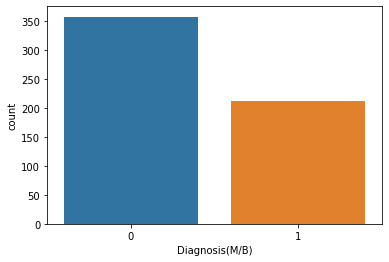

In [15]:
sns.countplot(df['Diagnosis(M/B)'])

In [16]:
df['Diagnosis(M/B)'].value_counts()    # M=1
                                       # B=0

0    357
1    212
Name: Diagnosis(M/B), dtype: int64

## Important feature selection
---

#### Find correlation between each features

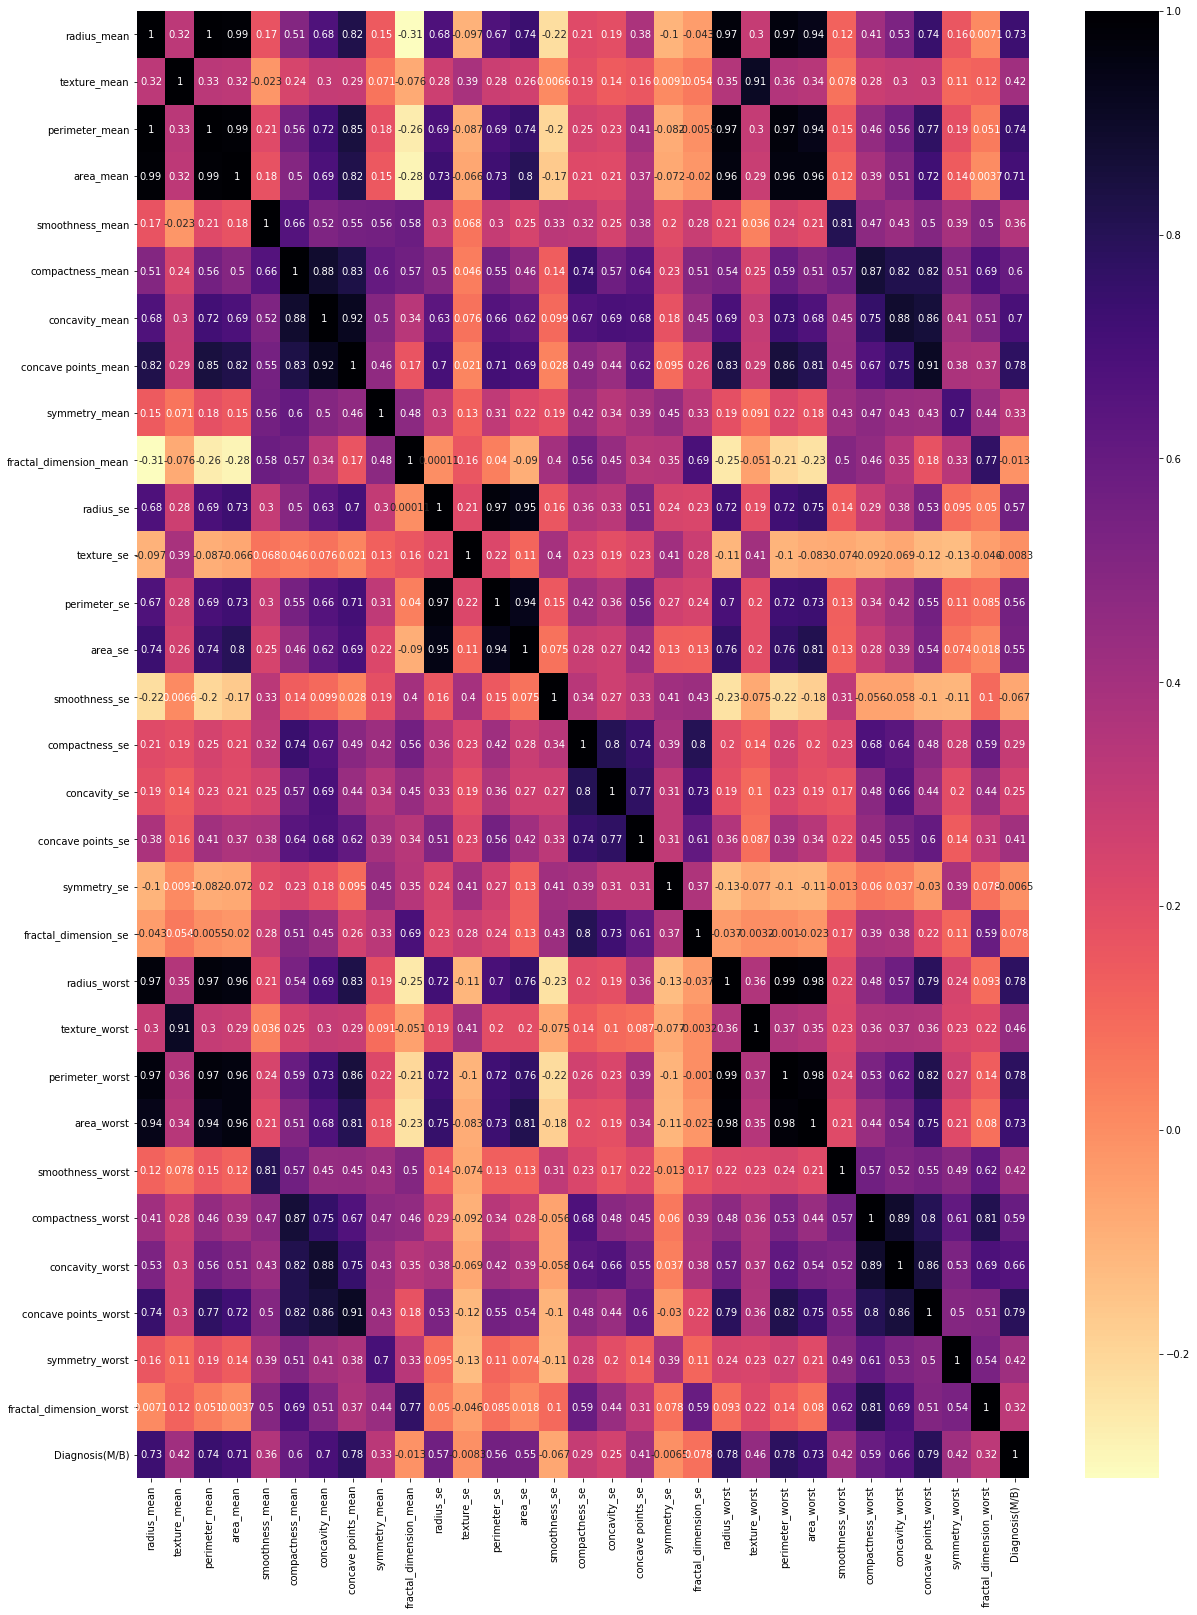

In [17]:
plt.figure(figsize = (20,27))
sns.heatmap(df.corr(),annot = True ,cmap = 'magma_r')

In [18]:
from sklearn.ensemble import ExtraTreesRegressor

In [19]:
selection = ExtraTreesRegressor()

In [20]:
selection.fit(x,y)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [21]:
selection.feature_importances_    #selection.feature_importances_

array([0.03293771, 0.01880485, 0.04413993, 0.03395662, 0.00510946,
       0.00391599, 0.04996006, 0.09414296, 0.00279639, 0.00221878,
       0.00521079, 0.00443083, 0.004775  , 0.01098168, 0.00436026,
       0.00457759, 0.00298549, 0.00567237, 0.00397564, 0.00320819,
       0.12476039, 0.03109758, 0.13098212, 0.08920402, 0.01926149,
       0.01279627, 0.03405408, 0.20660421, 0.0081835 , 0.00489576])

In [22]:
feature = list(x.columns)
feature

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

#### features importance 

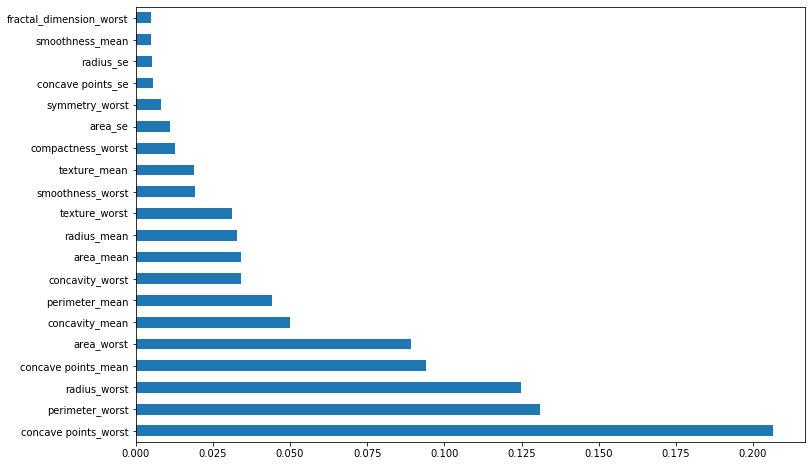

In [23]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


##### By this graph we can see the features which is impacting more for the detection of M/B for breast cancer

In [24]:
df.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis(M/B)
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1


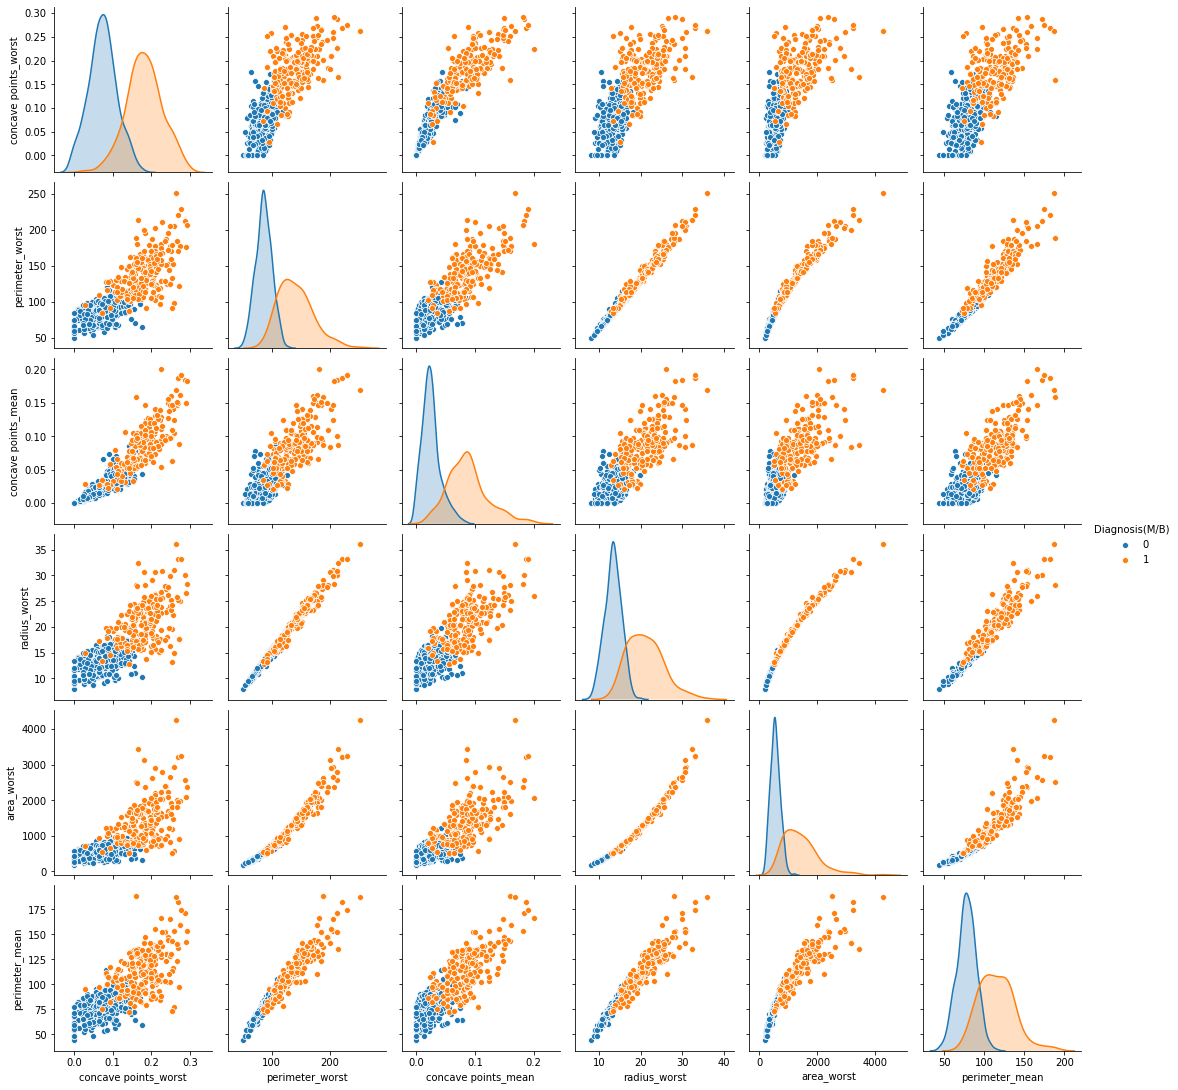

In [25]:
sns.pairplot(df, hue = 'Diagnosis(M/B)', vars = ['concave points_worst','perimeter_worst','concave points_mean','radius_worst','area_worst','perimeter_mean'])

#### As from the graph we can see how the features are corelated with each other.

In [26]:
from sklearn.svm import SVC
s = SVC()

In [27]:
s.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
pred = s.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,pred)

0.9300699300699301

#### As the accuracy of our model is 93% which is quit good in prediction

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, pred)

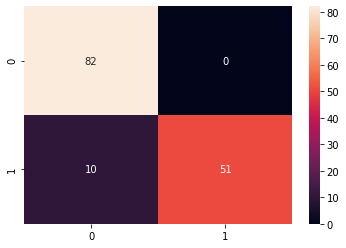

In [32]:
sns.heatmap(cm , annot = True)

####  ...
---
As we can see our model is predicting quit good for detection of M/B tumor as it predicting only 10 wrong i.e if it is B it 
predicting M and vise versa. which means our model is quit good 


In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        82
           1       1.00      0.84      0.91        61

    accuracy                           0.93       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.93      0.93       143



# Different type of Kernals

## 1.RBF

In [34]:
from sklearn.svm import SVC
svm_rbf = SVC(probability = True)
svm_rbf.fit(x_train,y_train)
y_pred = svm_rbf.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

[[82  0]
 [10 51]]


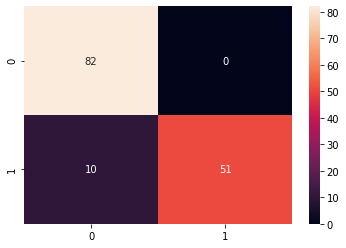

In [36]:
sns.heatmap(cm , annot = True)

##### As we can see our model is predicting quit good for detection of M/B tumor as it predicting only 10 wrong i.e if it is B it predicting M and vise versa. which means our model is quit good

In [37]:
cr = classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        82
           1       1.00      0.84      0.91        61

    accuracy                           0.93       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.93      0.93       143



In [38]:
df = pd.DataFrame(cr).transpose()

In [39]:
df

,precision,recall,f1-score,support
0,0.891304,1.000000,0.942529,82.00000
1,1.000000,0.836066,0.910714,61.00000
accuracy,0.930070,0.930070,0.930070,0.93007
macro avg,0.945652,0.918033,0.926622,143.00000
weighted avg,0.937671,0.930070,0.928958,143.00000


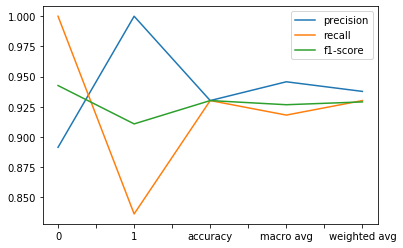

In [40]:
df1 = df.drop(['support'],axis=True)
df1.plot()

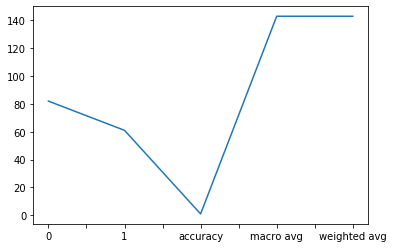

In [41]:
df2 = df['support']
df2.plot()

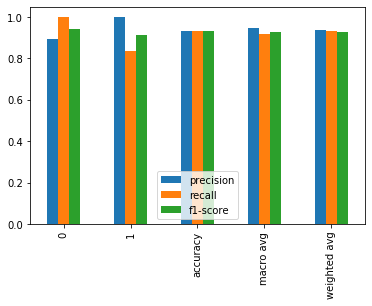

In [42]:
df1.plot.bar()

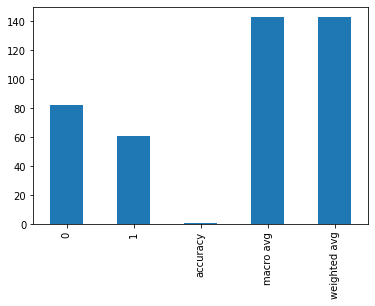

In [43]:
df2.plot.bar()    #support feature comparision

## 2.Polynomial Kernel


In [44]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### Prediction

In [45]:
y_pred = svclassifier.predict(x_test)

In [46]:
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

[[82  0]
 [13 48]]


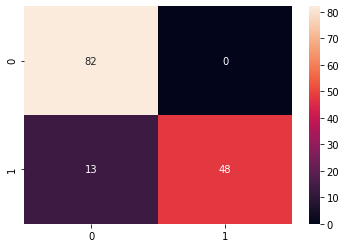

In [47]:
sns.heatmap(cm , annot = True)

##### As we can see our model is predicting quit good for detection of M/B tumor as it predicting only 13 wrong i.e if it is B it predicting M and vise versa. which means our model is quit good

In [48]:
cr = classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        82
           1       1.00      0.79      0.88        61

    accuracy                           0.91       143
   macro avg       0.93      0.89      0.90       143
weighted avg       0.92      0.91      0.91       143



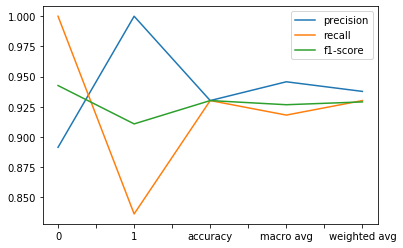

In [49]:
df1 = df.drop(['support'],axis=True)
df1.plot()

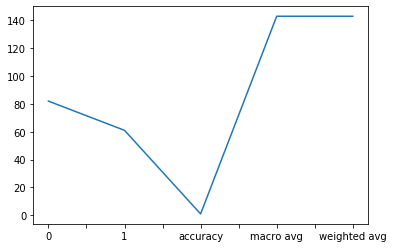

In [50]:
df2 = df['support']
df2.plot()

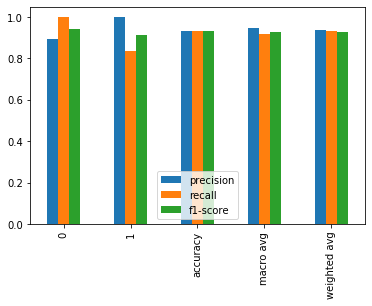

In [51]:
df1.plot.bar()

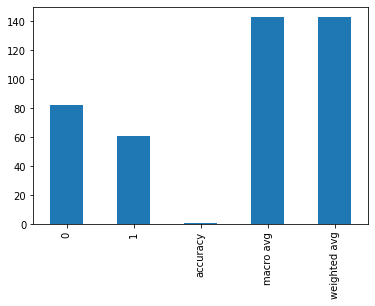

In [52]:
df2.plot.bar()

## 3.Gaussian kernel

In [53]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
y_pred = svclassifier.predict(x_test)

In [55]:
cm = confusion_matrix(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[82,  0],
       [10, 51]], dtype=int64)

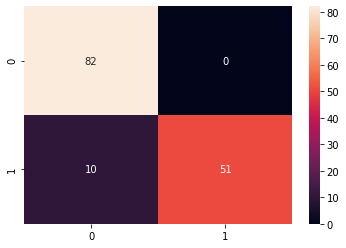

In [56]:
sns.heatmap(cm , annot = True)

##### As we can see our model is predicting quit good for detection of M/B tumor as it predicting only 10 wrong i.e if it is B it predicting M and vise versa. which means our model is quit good

In [57]:
cr = classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        82
           1       1.00      0.84      0.91        61

    accuracy                           0.93       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.93      0.93       143



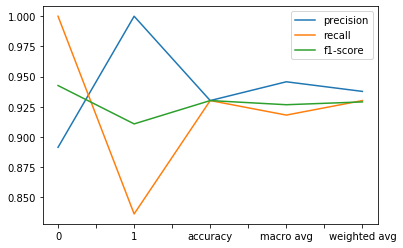

In [58]:
df1 = df.drop(['support'],axis=True)
df1.plot()

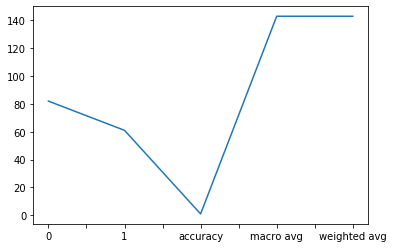

In [59]:
df2 = df['support']
df2.plot()

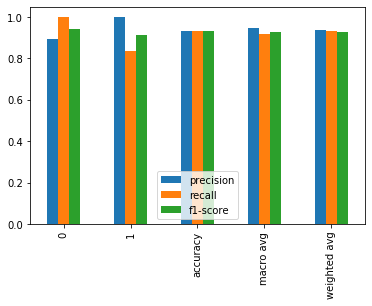

In [60]:
df1.plot.bar()

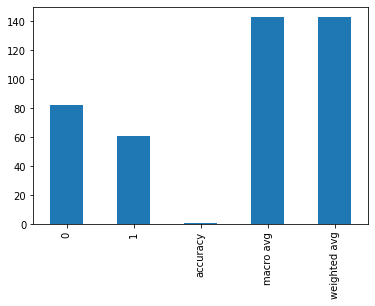

In [61]:
df2.plot.bar()

## 4. Sigmoid Kernel

In [62]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
y_pred = svclassifier.predict(x_test)

In [64]:
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

[[61 21]
 [53  8]]


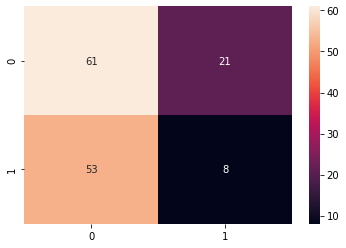

In [65]:
sns.heatmap(cm , annot = True)

##### As we can see our model is predicting quit good for detection of M/B tumor as it predicting only 74 wrong i.e if it is B it predicting M and vise versa. which means our model is quit good

In [66]:
cr = classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.74      0.62        82
           1       0.28      0.13      0.18        61

    accuracy                           0.48       143
   macro avg       0.41      0.44      0.40       143
weighted avg       0.42      0.48      0.43       143



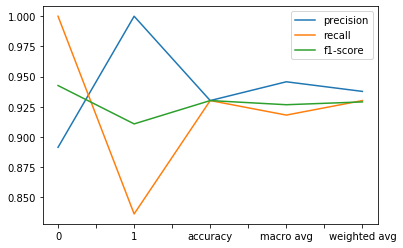

In [67]:
df1 = df.drop(['support'],axis=True)
df1.plot()

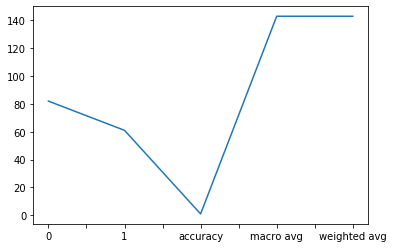

In [68]:
df2 = df['support']
df2.plot()

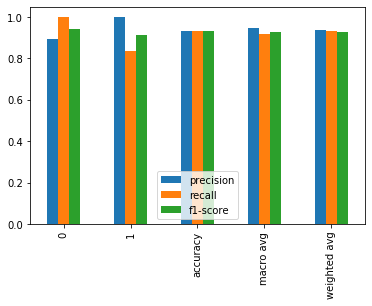

In [69]:
df1.plot.bar()

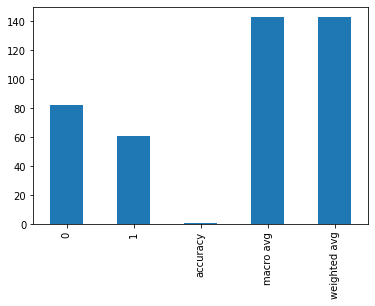

In [70]:
df2.plot.bar()

## 5. Linear SVM

In [71]:
from sklearn.svm import SVC
svm_lin = SVC(kernel='linear',probability=True)
svm_lin.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [72]:
y_pred = svm_lin.predict(x_test)

In [73]:
y_prob = svm_lin.predict_proba(x_test)

In [74]:
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

[[78  4]
 [ 5 56]]


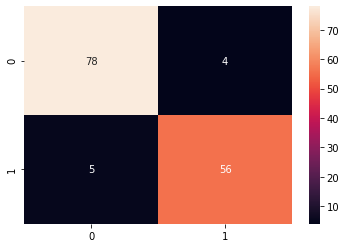

In [75]:
sns.heatmap(cm, annot = True)

#### As we can see our model is predicting quit good for detection of M/B tumor as it predicting only 9 wrong i.e if it is B it predicting M and vise versa. which means our model is quit good

In [76]:
cr = classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        82
           1       0.93      0.92      0.93        61

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



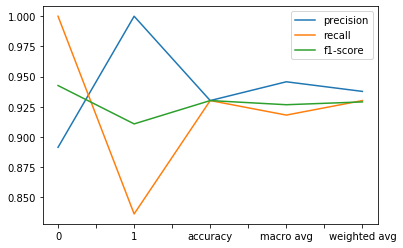

In [77]:
df1 = df.drop(['support'],axis=True)
df1.plot()

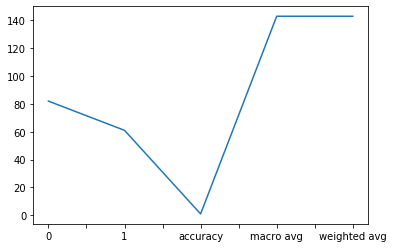

In [78]:
df2 = df['support']
df2.plot()

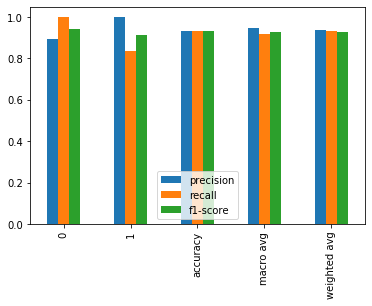

In [79]:
df1.plot.bar()

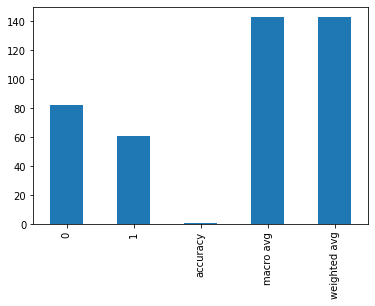

In [80]:
df2.plot.bar()

#### Conclusion-
---
As our LINEAR SVM giving a good model as compare to others
and
SIGMOID SVM is giving worst model